Fetching stock data...
Stock data fetched successfully.
Fetching economic data...
Economic data fetched successfully.
Calculating Moving Averages...
Moving Averages calculated.
Plotting data...


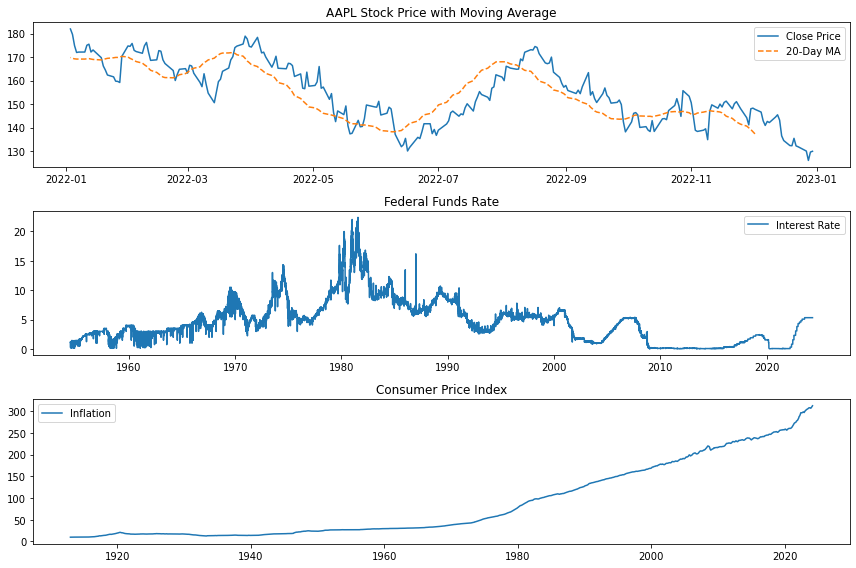

Plotting complete.

Stock Data Explanation:
- The first graph shows the historical stock prices (Open, High, Low, Close) for the selected symbol (AAPL).
- The blue line represents the closing prices over time, which is often used for technical analysis.
- The second graph depicts the trading volume (number of shares traded) over the same period.
- Understanding stock price movements and volume trends can help identify potential entry and exit points for trading strategies.
- The third graph illustrates the moving averages (MA) calculated based on the closing prices. A commonly used MA window is 20 days.
- Moving averages are technical indicators used to smooth out price data and identify trends over time.
Fetching recent news...
Recent news fetched successfully.
Analyzing sentiment...
Sentiment analysis completed.


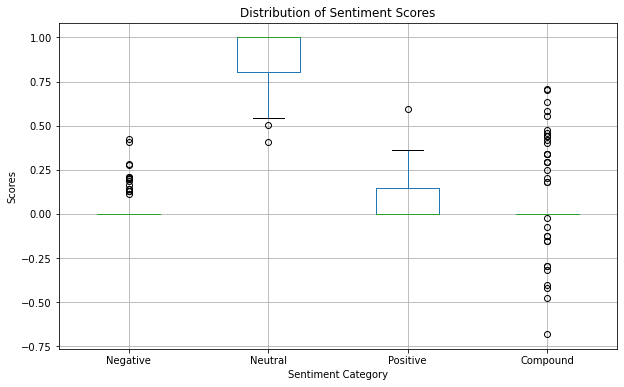


Analysis Guide:
- The box plot displays the distribution of sentiment scores for each sentiment category (Negative, Neutral, Positive) and the Compound score across all news articles.
- The boxes represent the interquartile range (IQR), with the median (50th percentile) indicated by the line inside the box.
- The whiskers extend to the minimum and maximum non-outlier values within 1.5 times the IQR from the lower and upper quartiles, respectively.
- Any points outside the whiskers are considered outliers.
- Use this visualization to understand the spread and central tendency of sentiment scores, as well as to identify potential outliers.


In [20]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Define ma_window as a global variable
ma_window = 20

# Function to fetch stock data from Alpha Vantage
def fetch_stock_data(symbol, api_key, start_date, end_date):
    print("Fetching stock data...")
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=full"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()['Time Series (Daily)']
        df = pd.DataFrame(data).T
        df.index = pd.to_datetime(df.index)
        df = df.astype(float)
        df = df[(df.index >= start_date) & (df.index <= end_date)]  # Filter data for the specified date range
        print("Stock data fetched successfully.")
        return df
    else:
        print(f"Failed to fetch data for symbol {symbol}. Status code: {response.status_code}")
        return None

# Function to fetch economic indicators from FRED
def fetch_economic_data(api_key):
    print("Fetching economic data...")
    fred = Fred(api_key=api_key)
    # Example economic indicators: Interest Rate and Inflation
    interest_rate = fred.get_series('DFF')  # Federal Funds Rate
    inflation = fred.get_series('CPIAUCNS')  # Consumer Price Index for All Urban Consumers
    print("Economic data fetched successfully.")
    return interest_rate, inflation

# Calculate Moving Averages (MA)
def calculate_moving_average(data):
    print("Calculating Moving Averages...")
    data['MA'] = data['4. close'].rolling(window=ma_window).mean()  # Use global variable ma_window
    print("Moving Averages calculated.")
    return data

# Function to fetch recent news articles related to the stock symbol
def fetch_news(symbol, api_key):
    print("Fetching recent news...")
    url = f"https://newsapi.org/v2/everything?q={symbol}&apiKey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        articles = response.json()['articles']
        print("Recent news fetched successfully.")
        return articles
    else:
        print("Failed to fetch recent news.")
        return None

# Function to perform sentiment analysis on news articles
def analyze_sentiment(articles):
    print("Analyzing sentiment...")
    analyzer = SentimentIntensityAnalyzer()
    sentiments = []
    for article in articles:
        text = article['title']
        sentiment = analyzer.polarity_scores(text)
        sentiments.append(sentiment)
    print("Sentiment analysis completed.")
    return sentiments

def plot_sentiment(sentiments):
    # Convert sentiments to a DataFrame
    df_sentiments = pd.DataFrame(sentiments)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    df_sentiments.boxplot(column=['neg', 'neu', 'pos', 'compound'])
    plt.title('Distribution of Sentiment Scores')
    plt.ylabel('Scores')
    plt.xlabel('Sentiment Category')
    plt.xticks([1, 2, 3, 4], ['Negative', 'Neutral', 'Positive', 'Compound'])
    plt.show()

# Plotting
def plot_data(stock_data, interest_rate, inflation, symbol):
    print("Plotting data...")
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(stock_data.index, stock_data['4. close'], label='Close Price')
    plt.plot(stock_data.index, stock_data['MA'], label=f'{ma_window}-Day MA', linestyle='--')
    plt.title(f'{symbol} Stock Price with Moving Average')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(interest_rate.index, interest_rate.values, label='Interest Rate')
    plt.title('Federal Funds Rate')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(inflation.index, inflation.values, label='Inflation')
    plt.title('Consumer Price Index')
    plt.legend()

    plt.tight_layout()
    plt.show()
    print("Plotting complete.")
    
def print_stock_data_explanation():
    print("\nStock Data Explanation:")
    print("- The first graph shows the historical stock prices (Open, High, Low, Close) for the selected symbol (AAPL).")
    print("- The blue line represents the closing prices over time, which is often used for technical analysis.")
    print("- The second graph depicts the trading volume (number of shares traded) over the same period.")
    print("- Understanding stock price movements and volume trends can help identify potential entry and exit points for trading strategies.")
    print("- The third graph illustrates the moving averages (MA) calculated based on the closing prices. A commonly used MA window is 20 days.")
    print("- Moving averages are technical indicators used to smooth out price data and identify trends over time.")

    
def print_analysis_guide():
    print("\nAnalysis Guide:")
    print("- The box plot displays the distribution of sentiment scores for each sentiment category (Negative, Neutral, Positive) and the Compound score across all news articles.")
    print("- The boxes represent the interquartile range (IQR), with the median (50th percentile) indicated by the line inside the box.")
    print("- The whiskers extend to the minimum and maximum non-outlier values within 1.5 times the IQR from the lower and upper quartiles, respectively.")
    print("- Any points outside the whiskers are considered outliers.")
    print("- Use this visualization to understand the spread and central tendency of sentiment scores, as well as to identify potential outliers.")


def main():
   
    api_key = 'KTJTMEG3G3AI8W9H'
    
    
    fred_api_key = '6d54c8a18d5d3d2016df2273cbdcd4de'


    news_api_key = 'b58f40c6ef89423ab81bfb85cf0f82cb'
    
    symbol = 'AAPL'
    start_date = '2022-01-01'
    end_date = '2022-12-31'

    try:
        stock_data = fetch_stock_data(symbol, api_key, start_date, end_date)
        if stock_data is not None:
            interest_rate, inflation = fetch_economic_data(fred_api_key)
            stock_data = calculate_moving_average(stock_data)
            plot_data(stock_data, interest_rate, inflation, symbol)
            print_stock_data_explanation()
            
            articles = fetch_news(symbol, news_api_key)  # Fetch news articles
            if articles:
                sentiments = analyze_sentiment(articles)  # Perform sentiment analysis on news
                
                plot_sentiment(sentiments)  # Plot sentiment analysis results
                print_analysis_guide()
            else:
                print("No news articles found.")
        else:
            print("Failed to fetch stock data.")
    except Exception as e:
        print(f"An error occurred: {e}")


if __name__ == "__main__":
    main()
